# Import libaries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

# Import datasets

In [62]:
df=pd.read_csv('creditcard.csv')

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.shape

(284807, 31)

In [65]:
df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [66]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [67]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [69]:
df['Class'].tail()

284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

## Percentage of total not fraud transaction

In [70]:
nfcount=0
notFraud=df['Class']
for i in range (len(notFraud)):
    if notFraud[i]==0:
        nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(notFraud))*100
print('percentage of not fraud transaction in the dataset: ',per_nf)

percentage of not fraud transaction in the dataset:  99.82725143693798


## Percentage of total fraud transaction

In [71]:
fcount=0
Fraud=df['Class']
for i in range (len(Fraud)):
    if Fraud[i]==0:
        fcount=fcount+1

fcount
per_f=(fcount/len(Fraud))*100
print('percentage of fraud transaction in the dataset: ',per_f)

percentage of fraud transaction in the dataset:  99.82725143693798


## visualization of dataset

In [72]:
plot_data=pd.DataFrame()
plot_data['Fraud transaction']=Fraud
plot_data['Genuine transaction']=notFraud
plot_data

,Fraud transaction,Genuine transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14348\1917921257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Fraud transaction', y= 'Genuine transaction', data = plot_data, palette='Blues',edgecolor='w')


<Axes: title={'center': 'Bar plot for Fraud VS Genuine transaction'}, xlabel='Fraud transaction', ylabel='Genuine transaction'>

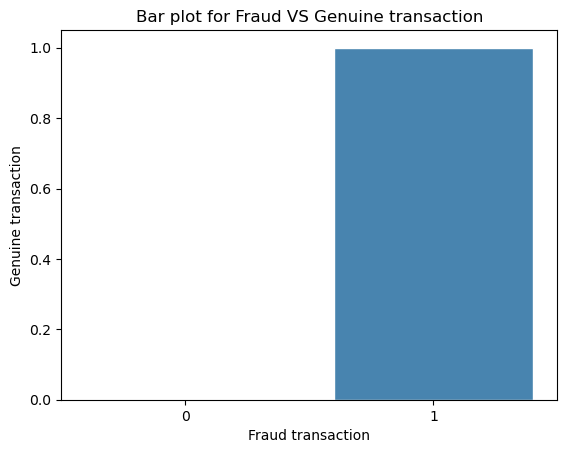

In [73]:
#THE RATIO OF GENUINE TRANSACTION ARE HIGHER THAN FRAUD TRANSACTION
plt.title("Bar plot for Fraud VS Genuine transaction")
sns.barplot(x= 'Fraud transaction', y= 'Genuine transaction', data = plot_data, palette='Blues',edgecolor='w')

Text(0.5, 1.0, 'Time VS amount')

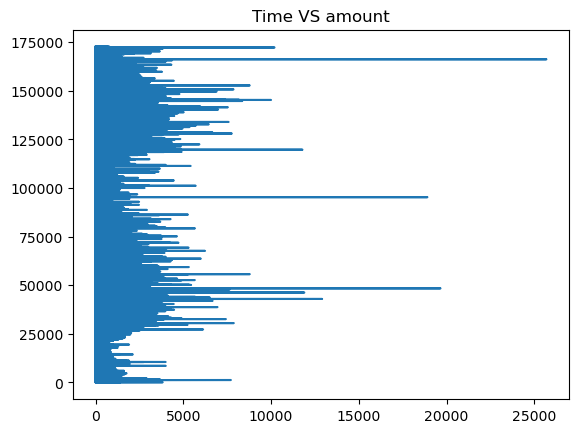

In [74]:
# PLOT THE RELATION BETWEEN TIME AND AMOUNT
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title('Time VS amount')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14348\1668057414.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],color='red');


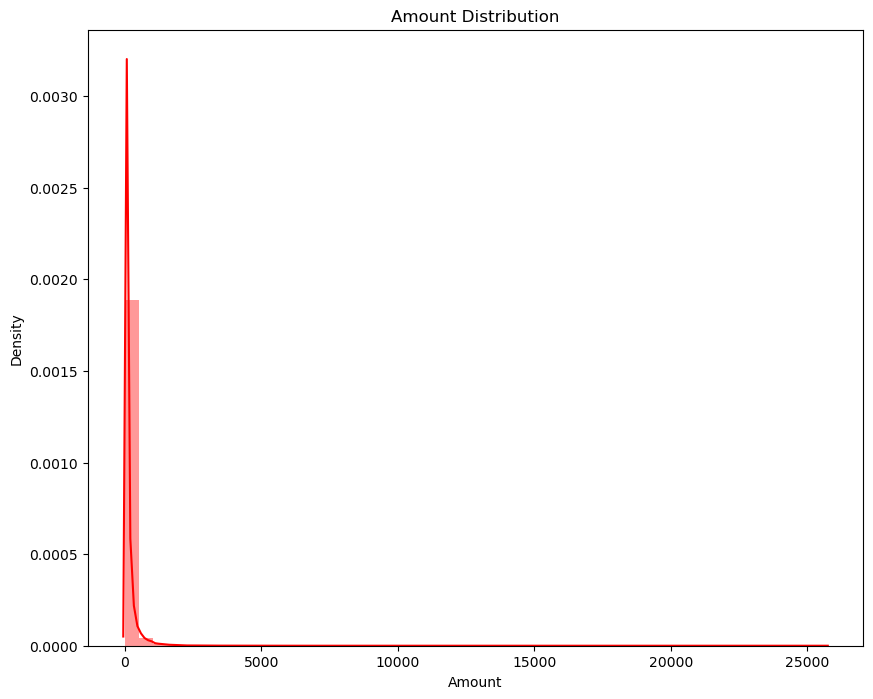

In [75]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')

sns.distplot(df['Amount'],color='red');

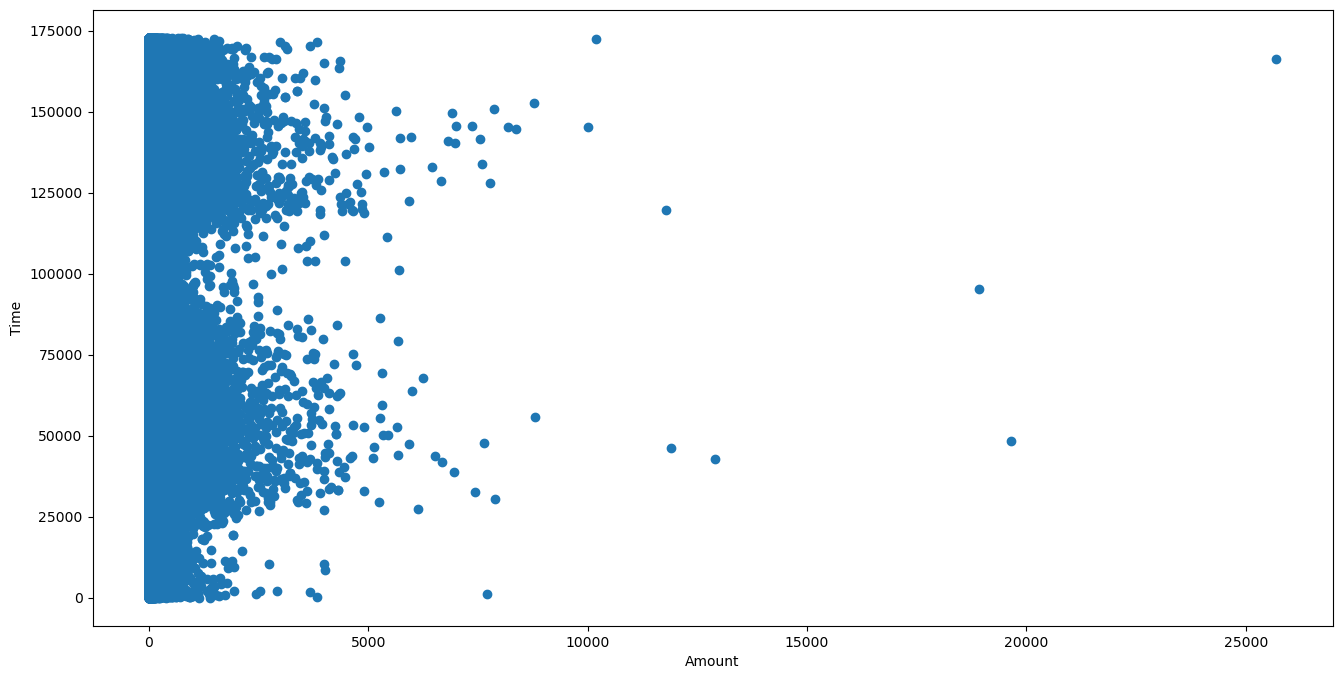

In [76]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Amount'],df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

## Correlation matrix

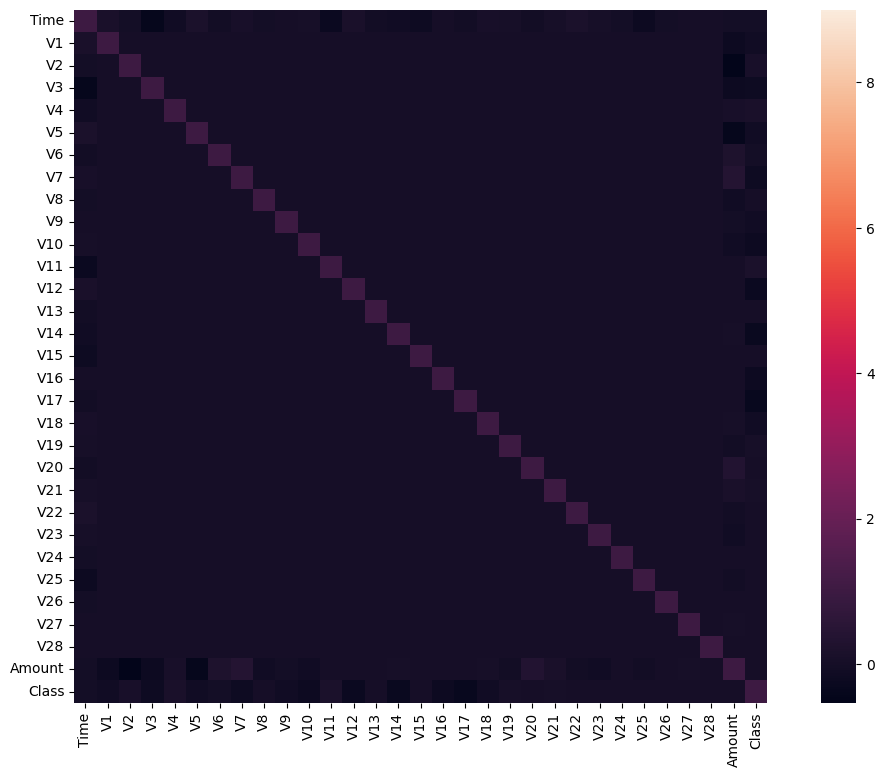

In [77]:
#correlation metrics help us to understand the core relation between two attributes
correlation_matrics = df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrics,vmax=9,square=True)
plt.show()

# Machine learning

In [78]:
x=df.drop(['Class'], axis = 1)#drop the target variable
y=df['Class']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state = 42)

In [80]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain,ytrain)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = logisticreg.predict(xtest)
accuracy =logisticreg.score(xtest,ytest)

## Confusion Matrix

In [82]:
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[56829    35]
 [   43    55]]


## Accuracy calculation

In [83]:
print('Accuracy score of the logistic regression model: ', accuracy*100,'%')

Accuracy score of the logistic regression model:  99.86306660580738 %
